# Project: Analysis of Global Child Mortality Rate

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I am attempting to investigate the Global Child Mortality Rate and the effect of various indices such as, Income, BMI of women, Fertility Rate of Women and Mean Years in School for women of reproductive age (15 to 44) on the rate of Child Mortality. The dataset is built for this analysis using downloaded data from "Gapminder". The questions that I have posed are:
1. Do richer countries (higher income) have lower Child Mortality Rates? (Income is the Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP))
2. Does Body Mass Index of women have a correlation with the Child Mortality rate? (The mean BMI (Body Mass Index) of the female population, counted in kilogram per square meter; this mean is calculated as if each country has the same age composition as the world population)
3. Does the Total fertility rate of women affect Child Mortality rates? (Total Fertility Rate is the number of children that would be born to each woman with prevailing age-specific fertility rates)
4. Do countries with more educated women have lower Child Mortality rates? (Education levels for women are considered as the mean years spent in school by women of reproductive age (15 to 44))

> The dataset contains data for various countries from 1990 through 2010.

> There are 7 columns in the dataset that hold data from Gapminder - 
1. Country
2. Year: From 1990 through 2010
3. Child Mortality Rate: Death of children under five years of age per 1,000 live births
4. Income: Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP)
5. BMI of women: The mean BMI (Body Mass Index) of the female population, counted in kilogram per square meter; this mean is calculated as if each country has the same age composition as the world population.
6. Babies per woman: Total Fertility Rate, which is the number of children that would be born to each woman with prevailing age-specific fertility rates
7. Mean Years in School: the mean years spent in school by women of reproductive age (15 to 44)

In [90]:
# importing all of the packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling


### General Properties & Building the Dataset

In [91]:
# Loading child mortality data
df_CM = pd.read_csv('child_mortality.csv')

In [92]:
df_CM.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
2,Algeria,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,4.28,4.20,4.14,4.07,4.00,3.94,3.88,3.82,3.76,3.76
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30


In [93]:
df_CM.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,424.543478,423.918478,423.271739,422.858696,422.478261,422.065217,422.065217,421.505435,421.494565,421.146739,...,7.080462,6.995282,6.908974,6.829282,6.747026,6.666718,6.588667,6.511231,6.436410,6.436410
std,45.319368,45.727500,46.390150,46.572719,46.706730,46.898053,46.093467,46.682862,45.973026,46.202633,...,7.892240,7.800311,7.704939,7.618957,7.528895,7.438964,7.355377,7.268417,7.189395,7.189395
min,322.000000,322.000000,283.000000,275.000000,272.000000,266.000000,309.000000,278.000000,316.000000,299.000000,...,0.310000,0.300000,0.290000,0.280000,0.280000,0.270000,0.260000,0.260000,0.250000,0.250000
25%,395.750000,395.750000,395.000000,394.750000,393.000000,393.000000,392.000000,391.750000,391.000000,391.000000,...,1.910000,1.890000,1.870000,1.845000,1.820000,1.800000,1.775000,1.755000,1.730000,1.730000
50%,423.500000,423.500000,422.000000,422.000000,422.000000,422.000000,422.000000,420.500000,420.000000,420.000000,...,4.130000,4.070000,4.010000,3.960000,3.900000,3.840000,3.790000,3.750000,3.730000,3.730000
75%,453.500000,452.750000,452.500000,451.250000,451.250000,450.250000,448.000000,448.000000,447.000000,447.000000,...,9.305000,9.160000,9.045000,8.930000,8.815000,8.695000,8.605000,8.525000,8.455000,8.455000
max,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,...,39.200000,38.700000,38.300000,38.000000,37.600000,37.200000,36.900000,36.500000,36.200000,36.200000


In [94]:
df_CM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


In [95]:
#Check for null values
df_CM[df_CM.isna().any(axis=1)]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
48,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.20,13.10,12.90,12.80,12.70,12.50,12.40,12.20,12.10,12.10
72,Holy See,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.01,4.94,4.86,4.79,4.72,4.64,4.57,4.49,4.41,4.41
97,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.67,1.65,1.62,1.60,1.58,1.56,1.54,1.52,1.50,1.50
106,Marshall Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.72,9.59,9.46,9.33,9.20,9.07,8.95,8.82,8.70,8.70
112,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.80,0.79,0.77,0.76,0.75,0.73,0.72,0.71,0.70,0.70
119,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.80,14.70,14.50,14.40,14.20,14.10,13.90,13.80,13.70,13.70
131,Palau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.87,4.80,4.73,4.67,4.60,4.54,4.47,4.41,4.35,4.35
145,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.60,0.59,0.58,0.57,0.56,0.55,0.54,0.53,0.52,0.52
162,St. Kitts and Nevis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.37,4.32,4.28,4.23,4.19,4.15,4.11,4.07,4.03,4.03


> Since there are only 11 rows with null values, drop rows with null values

In [96]:
#Drop rows with null values
df_CM.dropna(inplace=True)

In [97]:
#Check for duplicates
df_CM.duplicated().sum()

0

> Plotting a quick graph of Gobal child mortality rate using the mean for each year

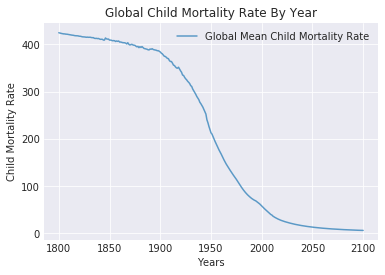

In [98]:
years = df_CM.columns[1:302].values
child_mortality_mean = df_CM.iloc[:,1:302].mean()
plt.plot(years, child_mortality_mean, alpha=.7, label='Global Mean Child Mortality Rate');
plt.ylabel('Child Mortality Rate')
plt.xlabel('Years')
plt.title('Global Child Mortality Rate By Year')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(50))
majors = ["", "1800", "1850", "1900", "1950", "2000", "2050", "2100"]
plt.gca().xaxis.set_major_formatter(plticker.FixedFormatter(majors))
plt.legend();

> As the graph shows, global child mortality rates have been falling since 1800.

> Now plotting a quick graph of the child mortality rate in United States using the mean for each year.

In [99]:
df_CM[df_CM['country'] == 'United States'].iloc[:,1:302]

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
186,329.0,329.0,329.0,329.0,329.0,329.0,329.0,329.0,329.0,329.0,...,1.87,1.85,1.83,1.81,1.78,1.76,1.74,1.72,1.7,1.7


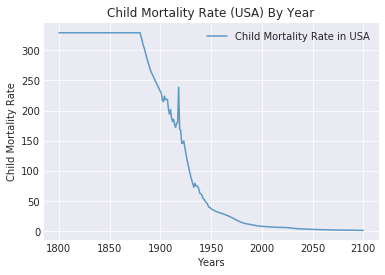

In [100]:
years = df_CM.columns[1:302]
child_mortality_usa = df_CM[df_CM['country'] == 'United States'].iloc[:,1:302].sum()
plt.plot(years, child_mortality_usa, alpha=.7, label='Child Mortality Rate in USA');
plt.ylabel('Child Mortality Rate')
plt.xlabel('Years')
plt.title('Child Mortality Rate (USA) By Year')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(50))
majors = ["", "1800", "1850", "1900", "1950", "2000", "2050", "2100"]
plt.gca().xaxis.set_major_formatter(plticker.FixedFormatter(majors))
plt.legend();

> Similar to global child mortality rates, the child mortality rates in USA have been falling since 1800 as well.

> Building a dataframe so that effects of other indices can be studied on child mortality. For this we are going to consider data from 1990 to 2010 to limit the amount of data and also because data for rest of the factors are not available for all years.

In [101]:
df_CM = df_CM[['country', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', 
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']]

In [102]:
df_CM.head(2)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,179.0,173.0,167.0,161.0,156.0,151.0,146.0,142.0,138.0,...,125.0,121.0,117.0,113.0,109.0,104.0,100.0,96.0,91.9,88.0
1,Albania,40.7,38.9,37.4,35.9,34.5,33.2,31.7,30.3,28.8,...,24.5,23.1,21.8,20.4,19.2,17.9,16.7,15.5,14.4,13.3


> Creating a new dataframe and transposing the data into rows so that we can add more indicator columns.

In [103]:
rows = df_CM.shape[0]
cols = df_CM.shape[1]
country_list = []
year_list = []
child_mortality_list = []

for r in np.arange(0, rows):
    for c in np.arange(1, cols):
        country_list.append(df_CM.iloc[r,0])
        year_list.append(df_CM.columns.values[c])
        child_mortality_list.append(df_CM.iloc[r,c])
        
df = pd.DataFrame({'country': country_list, 'year': year_list, 'child_mortality': child_mortality_list})

In [104]:
df.head(2)

,country,year,child_mortality
0,Afghanistan,1990,179.0
1,Afghanistan,1991,173.0


In [105]:
df.shape

(3864, 3)

> Function to add new indicators to the main dataframe.

In [106]:
def add_indicator(df1, df2, col_name):
    rows = df2.shape[0]
    cols = df2.shape[1]
    col_pos = pd.to_numeric(df1.shape[1])
    country_list = df1['country'].unique()
    year_list = df1['year'].unique()
    df1[col_name] = np.nan
    for r in np.arange(0, rows):
        for c in np.arange(1, cols):
            df1.iloc[df1[(df1['country'] == df2.iloc[r,0]) & (df1['year'] == df2.columns.values[c])].index, col_pos] = df2.iloc[r,c]    

> Reading Income data.

In [107]:
df_income = pd.read_csv('income.csv')

In [108]:
df_income.head(5)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,1860,1650,1520,1010,721,1030,942,865,800,...,646,1020,1060,1030,1100,1120,1250,1270,1500,1670
1,Albania,4460,3230,3020,3320,3620,4130,4530,4060,4450,...,5950,6240,6610,7000,7430,7910,8450,9160,9530,9930
2,Algeria,10300,9930,9870,9450,9170,9340,9560,9510,9840,...,10400,10900,11500,11800,12400,12400,12600,12700,12700,12900
3,Andorra,28400,28000,27200,26000,25900,26100,27200,29700,30800,...,31800,31900,34500,36300,39800,42700,43400,41400,41700,39000
4,Angola,4760,4650,4240,3120,3060,3410,3750,3890,3950,...,3920,4320,4300,4610,5110,5500,6040,6470,6290,6360


In [109]:
#Check for null values
df_income[df_income.isna().any(axis=1)]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010


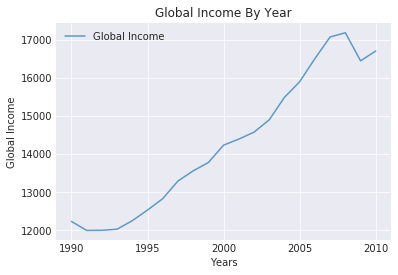

In [110]:
#A quick graph of global mean income

income_mean = df_income.iloc[:,1:22].mean()
years = df_income.columns[1:22]
plt.plot(years, income_mean, alpha=.7, label='Global Income');
plt.ylabel('Global Income')
plt.xlabel('Years')
plt.title('Global Income By Year')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
majors = ["", "1990", "1995", "2000", "2005", "2010"]
plt.gca().xaxis.set_major_formatter(plticker.FixedFormatter(majors))
plt.legend();

> A steady increase in the Global Mean income is seen, except for the sharp drop during the great recession of 2008.

> Adding an "income" column to the main dataframe and appending income data to it using the add_indicator function.

In [111]:
add_indicator(df, df_income, 'income')

In [112]:
df.head(2)

,country,year,child_mortality,income
0,Afghanistan,1990,179.0,1860.0
1,Afghanistan,1991,173.0,1650.0


> Reading Women's BMI data.

In [113]:
df_bmi = pd.read_csv('bmi_women.csv')

In [114]:
df_bmi.head(2)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,20.7,20.7,20.7,20.6,20.6,20.6,20.6,20.6,20.6,20.6,20.6,20.6,20.6,20.7,20.8,20.8,20.9,21.0,21.1
1,Albania,25.1,25.1,25.0,24.9,24.9,24.9,25.0,25.0,25.0,25.1,25.1,25.2,25.3,25.3,25.4,25.5,25.5,25.6,25.7


In [115]:
#Check for null values
df_bmi[df_bmi.isna().any(axis=1)]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008


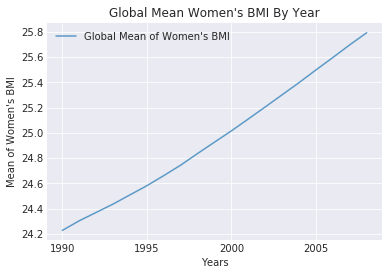

In [116]:
#A quick graph of global mean of Women's BMI

bmi_mean = df_bmi.iloc[:,1:22].mean()
years = df_bmi.columns[1:22]
plt.plot(years, bmi_mean, alpha=.7, label='Global Mean of Women\'s BMI');
plt.ylabel('Mean of Women\'s BMI')
plt.xlabel('Years')
plt.title('Global Mean Women\'s BMI By Year')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
majors = ["", "1990", "1995", "2000", "2005", "2010"]
plt.gca().xaxis.set_major_formatter(plticker.FixedFormatter(majors))
plt.legend();

> A steady rise in the Global Mean of women's BMI can be seen.

> Appending Women's BMI data to the main dataframe using the add_indicator function.

In [117]:
add_indicator(df, df_bmi, 'bmi')

In [118]:
df.head(2)

,country,year,child_mortality,income,bmi
0,Afghanistan,1990,179.0,1860.0,20.7
1,Afghanistan,1991,173.0,1650.0,20.7


> Reading Women's Fertility data.

In [119]:
df_fertility = pd.read_csv('women_fertility.csv')

In [120]:
df_fertility.head(2)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,7.47,7.48,7.50,7.54,7.57,7.61,7.63,7.64,7.62,...,7.39,7.27,7.14,6.99,6.83,6.65,6.46,6.25,6.04,5.82
1,Albania,2.98,2.91,2.83,2.75,2.67,2.59,2.51,2.42,2.33,...,2.07,1.98,1.90,1.82,1.75,1.70,1.67,1.65,1.65,1.65


In [121]:
#Check for null values
df_fertility[df_fertility.isna().any(axis=1)]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010


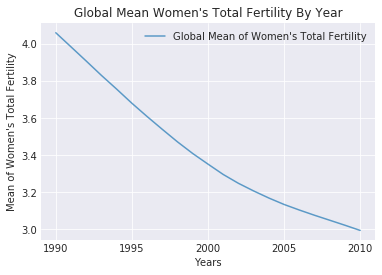

In [122]:
#A quick graph of global mean of Women's Total Fertility

fertility_mean = df_fertility.iloc[:,1:22].mean()
years = df_fertility.columns[1:22]
plt.plot(years, fertility_mean, alpha=.7, label='Global Mean of Women\'s Total Fertility');
plt.ylabel('Mean of Women\'s Total Fertility')
plt.xlabel('Years')
plt.title('Global Mean Women\'s Total Fertility By Year')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
majors = ["", "1990", "1995", "2000", "2005", "2010"]
plt.gca().xaxis.set_major_formatter(plticker.FixedFormatter(majors))
plt.legend();

> A steady decline in the Global Mean of women's total fertility can be seen.

> Appending Women's Fertility data to the main dataframe using the add_indicator function.

In [123]:
add_indicator(df, df_fertility, 'fertility')

In [124]:
df.head(2)

,country,year,child_mortality,income,bmi,fertility
0,Afghanistan,1990,179.0,1860.0,20.7,7.47
1,Afghanistan,1991,173.0,1650.0,20.7,7.48


> Reading data for Mean Years in School for Women.

In [125]:
df_yrs_in_school = pd.read_csv('mean_years_school.csv')

In [126]:
df_yrs_in_school.head(2)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.5,...,0.5,0.5,0.5,0.6,0.6,0.6,0.7,0.7,0.7,0.8
1,Albania,8.6,8.8,8.9,9.0,9.1,9.3,9.4,9.5,9.6,...,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7


> Adding a column for 2010 and setting the data for 2009 to it.

In [127]:
df_yrs_in_school['2010'] = df_yrs_in_school['2009']

In [128]:
df_yrs_in_school.tail(2)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
172,Zambia,4.8,4.9,5.0,5.1,5.2,5.3,5.5,5.6,5.7,...,6.0,6.1,6.2,6.3,6.4,6.5,6.5,6.6,6.7,6.7
173,Zimbabwe,5.9,6.1,6.2,6.4,6.6,6.7,6.9,7.1,7.2,...,7.7,7.9,8.1,8.2,8.4,8.5,8.7,8.8,9.0,9.0


In [129]:
df_yrs_in_school[df_yrs_in_school.isna().any(axis=1)]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010


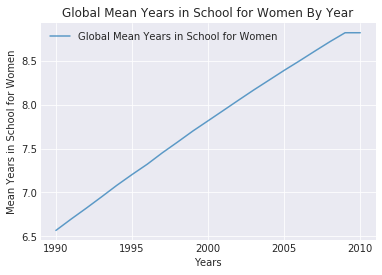

In [130]:
#A quick graph of global mean years in school for women_fertility.csv

yrs_in_school_mean = df_yrs_in_school.iloc[:,1:22].mean()
years = df_yrs_in_school.columns[1:22]
plt.plot(years, yrs_in_school_mean, alpha=.7, label='Global Mean Years in School for Women');
plt.ylabel('Mean Years in School for Women')
plt.xlabel('Years')
plt.title('Global Mean Years in School for Women By Year')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
majors = ["", "1990", "1995", "2000", "2005", "2010"]
plt.gca().xaxis.set_major_formatter(plticker.FixedFormatter(majors))
plt.legend();

> A steady rise in the Global Mean years in school for women can be seen.

> Appending data for Mean Years in School for women to the main dataframe using the add_indicator function.

In [131]:
add_indicator(df, df_yrs_in_school, 'yrs_in_school')

In [132]:
df.head(2)

,country,year,child_mortality,income,bmi,fertility,yrs_in_school
0,Afghanistan,1990,179.0,1860.0,20.7,7.47,0.3
1,Afghanistan,1991,173.0,1650.0,20.7,7.48,0.3


In [133]:
df.shape

(3864, 7)

### Data Cleaning (Checking for null values and missing data )

In [134]:
#Check for null values
df[df.isna().any(axis=1)].count()

country            577
year               577
child_mortality    577
income             577
bmi                190
fertility          577
yrs_in_school      346
dtype: int64

In [135]:
df[(df['bmi'].isnull()) & ~(df['year'].isin(['2009','2010']))]

,country,year,child_mortality,income,bmi,fertility,yrs_in_school
3150,South Sudan,1990,254.0,2100.0,NaN,6.76,NaN
3151,South Sudan,1991,249.0,2180.0,NaN,6.73,NaN
3152,South Sudan,1992,243.0,2230.0,NaN,6.69,NaN
3153,South Sudan,1993,238.0,2240.0,NaN,6.64,NaN
3154,South Sudan,1994,231.0,2220.0,NaN,6.60,NaN
3155,South Sudan,1995,224.0,2220.0,NaN,6.55,NaN
3156,South Sudan,1996,217.0,2280.0,NaN,6.50,NaN
3157,South Sudan,1997,209.0,2440.0,NaN,6.44,NaN
3158,South Sudan,1998,201.0,2510.0,NaN,6.38,NaN
3159,South Sudan,1999,192.0,2630.0,NaN,6.30,NaN


> South Sudan is missing BMI values for all years. Dropping South Sudan from the dataset.

In [136]:
df.drop(index = df[df['country'] == 'South Sudan'].index, inplace = True)

In [137]:
df[(df['bmi'].isnull())]['year'].unique()

array(['2009', '2010'], dtype=object)

In [138]:
#getting indexes of all rows where BMI is null
ind = df.index[(df['bmi'].isnull())]

In [139]:
#getting the bmi values for 2008
bmi_year_2008 = df[df['year'] == '2008']

> Updating 2009 & 2010 BMI columns with values for the year 2008.

In [140]:
for i in ind:
    p = bmi_year_2008[bmi_year_2008['country'] == df.loc[i][0]]['bmi'].values
    df.at[i, 'bmi'] = p[0]

In [141]:
df[(df['bmi'].isnull())]

,country,year,child_mortality,income,bmi,fertility,yrs_in_school


In [142]:
#Check for null values
df[df.isna().any(axis=1)]

,country,year,child_mortality,income,bmi,fertility,yrs_in_school
273,Barbados,1990,18.1,14100.0,27.5,1.74,NaN
274,Barbados,1991,17.4,13500.0,27.5,1.73,NaN
275,Barbados,1992,16.7,12500.0,27.6,1.73,NaN
276,Barbados,1993,16.1,12600.0,27.7,1.73,NaN
277,Barbados,1994,15.6,13100.0,27.7,1.73,NaN
278,Barbados,1995,15.2,13300.0,27.8,1.73,NaN
279,Barbados,1996,15.0,13700.0,27.9,1.73,NaN
280,Barbados,1997,14.9,14300.0,28.0,1.74,NaN
281,Barbados,1998,14.9,14800.0,28.1,1.74,NaN
282,Barbados,1999,15.0,14800.0,28.2,1.74,NaN


> Updating the null values in years in school column with zero.

In [143]:
df['yrs_in_school'] = df['yrs_in_school'].fillna(0)

In [144]:
#Check for null values
df[df.isna().any(axis=1)]

,country,year,child_mortality,income,bmi,fertility,yrs_in_school


<a id='eda'></a>
## Exploratory Data Analysis


### 1> Do richer countries (higher income) have lower Child Mortality Rates?

In [145]:
df.groupby('year')['income'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1990,183.0,11856.005464,15198.139612,386.0,2370.0,5900.0,14800.0,112000.0
1991,183.0,11642.393443,15020.027298,395.0,2350.0,5830.0,14150.0,107000.0
1992,183.0,11670.147541,15356.996184,361.0,2240.0,5970.0,13200.0,104000.0
1993,183.0,11711.459016,15562.220542,377.0,2195.0,6020.0,14000.0,99800.0
1994,183.0,11922.459016,16012.311528,385.0,2175.0,6070.0,14050.0,101000.0
1995,183.0,12179.595628,16325.142390,380.0,2275.0,6120.0,13750.0,102000.0
1996,183.0,12474.409836,16516.367930,413.0,2365.0,6220.0,14350.0,103000.0
1997,183.0,12934.967213,17213.398034,505.0,2410.0,6500.0,15250.0,106000.0
1998,183.0,13180.322404,17363.558918,550.0,2495.0,6360.0,15450.0,103000.0


### The above dataset shows that there is significant difference between the average of the highest income and average of the lowest income countries in all years.

### Plotting a bar chart of the Child Mortality Rates in the year 2000 by Income buckets.

In [146]:
df[df['year'] == '2000']['income'].describe()

count       183.000000
mean      13833.437158
std       18137.621204
min         573.000000
25%        2565.000000
50%        6950.000000
75%       15900.000000
max      108000.000000
Name: income, dtype: float64

In [147]:
x = np.array([0, 1, 2, 3])

# Calculating sum of child mortality rate in countries in bottom 1st, 2nd, 3rd & 4th quartile by income in the year 2000.
CM_qtr1 = df[(df['year'] == '2000') & (df.income <= 2567.500000)]['child_mortality'].sum()
CM_qtr2 = df[(df['year'] == '2000') & (df.income > 2567.500000) & (df.income <= 6815.000000)]['child_mortality'].sum()
CM_qtr3 = df[(df['year'] == '2000') & (df.income > 6815.000000) & (df.income <= 15800.000000)]['child_mortality'].sum()
CM_qtr4 = df[(df['year'] == '2000') & (df.income > 15800.000000) & (df.income <= 108000.000000)]['child_mortality'].sum()

y = np.array([CM_qtr1, CM_qtr2, CM_qtr3, CM_qtr4])

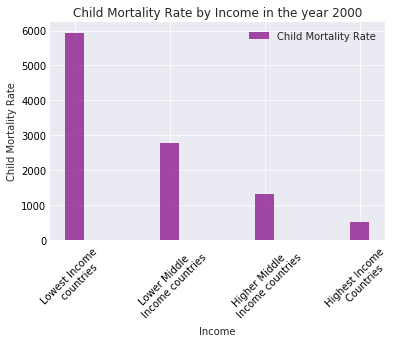

In [148]:
width = 0.20
# plot bars
plt.bar(x, y, width, color='purple', alpha=.7, label='Child Mortality Rate');

# title and labels
plt.ylabel('Child Mortality Rate')
plt.xlabel('Income')
plt.title('Child Mortality Rate by Income in the year 2000')
locations = x  # xtick locations
labels = ['Lowest Income \n countries', 'Lower Middle \n Income countries', 'Higher Middle \n Income countries', 'Highest Income \n Countries']  # xtick labels
plt.xticks(locations, labels)
plt.tick_params(axis="x", labelsize=10, rotation=45, labelcolor="black")
plt.tick_params(axis="y", labelsize=10, labelcolor="black")


# legend
plt.legend();

### The bar graph above suggests that the Child Mortality Rate decreases as Income Increases.

### 2> Does Body Mass Index of women have a correlation with Child Mortality rates?

In [149]:
df.head(2)

,country,year,child_mortality,income,bmi,fertility,yrs_in_school
0,Afghanistan,1990,179.0,1860.0,20.7,7.47,0.3
1,Afghanistan,1991,173.0,1650.0,20.7,7.48,0.3


In [150]:
df['bmi'].describe()

count    3843.000000
mean       24.896149
std         2.477275
min        18.800000
25%        22.900000
50%        25.200000
75%        26.400000
max        34.300000
Name: bmi, dtype: float64

> Histogram for the mean Women's BMI between the years 1990 and 2010

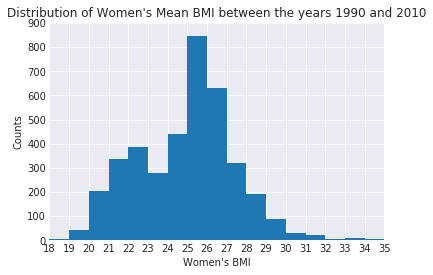

In [151]:
buckets=[18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]
plt.hist(df['bmi'],bins=buckets,histtype='bar');
plt.title("Distribution of Women\'s Mean BMI between the years 1990 and 2010");
plt.axis([18, 35, 0, 900]) 
plt.ylabel('Counts')
plt.xlabel('Women\'s BMI')
locations=[18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]
labels=[18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]
plt.xticks(locations, labels);

> Plotting a scatterplot for bmi vs child mortality

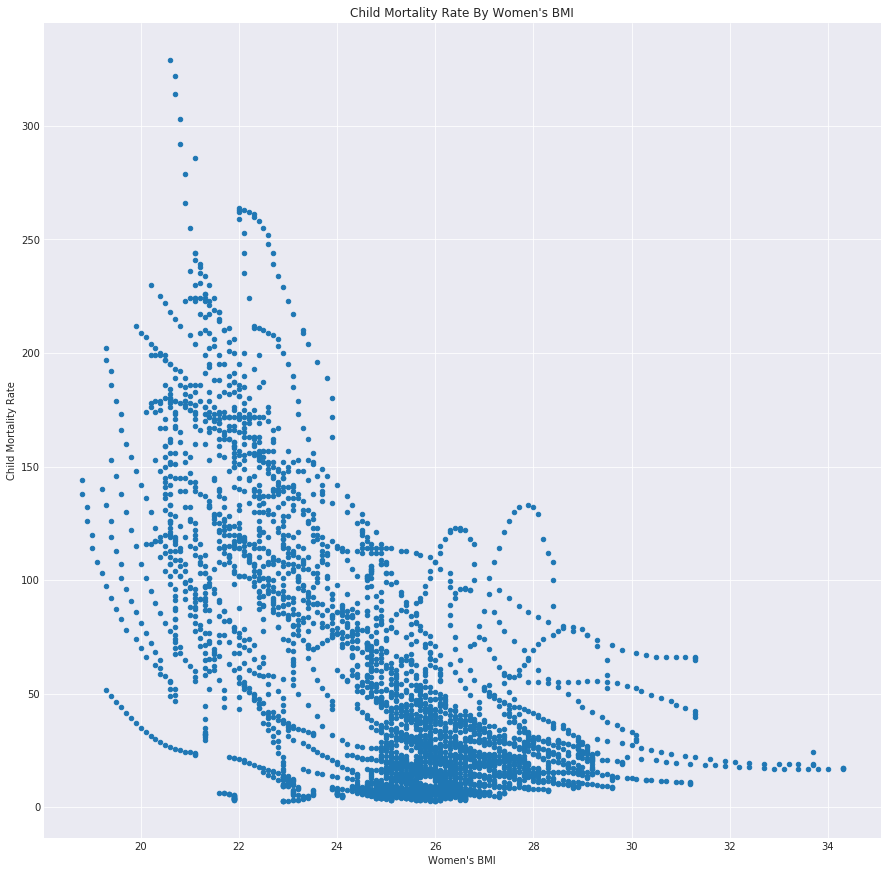

In [152]:
df.plot(kind='scatter', x='bmi', y='child_mortality', figsize=(15,15));
plt.ylabel('Child Mortality Rate')
plt.xlabel('Women\'s BMI')
plt.title('Child Mortality Rate By Women\'s BMI');

### The scatterplot above suggests that the Child Mortality Rate is higher for lower BMI, i.e. Child Mortality Rate seems to be inversely proportional to Women's BMI.

### 3> Does the Total fertility rate of women affect Child Mortality rates?

In [153]:
df['fertility'].describe()

count    3843.000000
mean        3.409318
std         1.770938
min         1.120000
25%         1.870000
50%         2.890000
75%         4.845000
max         8.610000
Name: fertility, dtype: float64

> Histogram for the mean Women's Total Fertility between the years 1990 and 2010

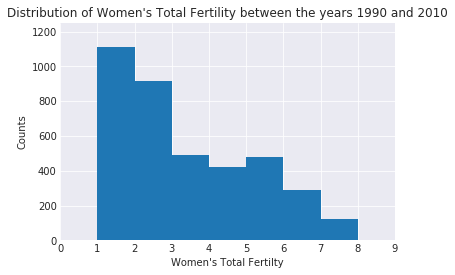

In [154]:
buckets=[0,1,2,3,4,5,6,7,8,9]
plt.hist(df['fertility'],bins=buckets,histtype='bar');
plt.title("Distribution of Women\'s Total Fertility between the years 1990 and 2010");
plt.axis([0, 9, 0, 1250]) 
plt.ylabel('Counts')
plt.xlabel('Women\'s Total Fertilty')
locations=[0,1,2,3,4,5,6,7,8,9]
labels=[0,1,2,3,4,5,6,7,8,9]
plt.xticks(locations, labels);

> Plotting a scatterplot for Women's Total Fertilty vs child mortality

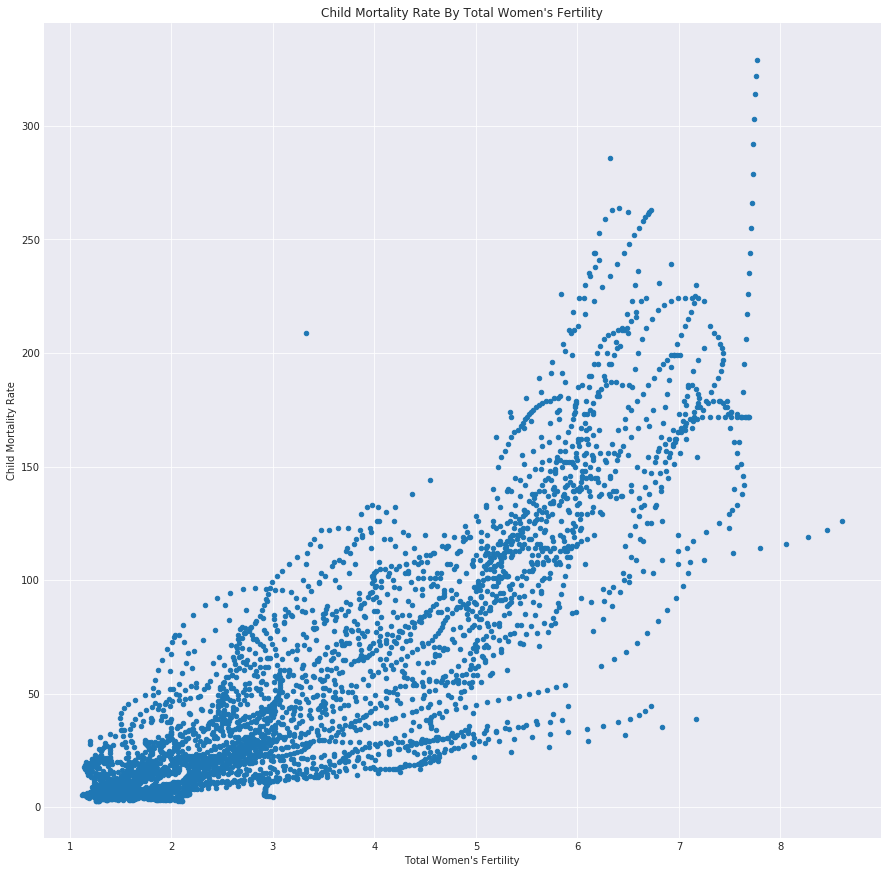

In [155]:
df.plot(kind='scatter', x='fertility', y='child_mortality', figsize=(15,15));
plt.ylabel('Child Mortality Rate')
plt.xlabel('Total Women\'s Fertility')
plt.title('Child Mortality Rate By Total Women\'s Fertility');

### The scatterplot above suggests that the Child Mortality Rate is higher for higher Total Women's Fertility, i.e. Child Mortality Rate seems to be directly proportional to Total Women's Fertility.

### 4> Do countries with more educated women have lower Child Mortality rates?

In [156]:
df['yrs_in_school'].describe()

count    3843.000000
mean        7.354359
std         3.969110
min         0.000000
25%         4.000000
50%         7.900000
75%        10.900000
max        14.700000
Name: yrs_in_school, dtype: float64

> Histogram for the mean years in school for Women between the years 1990 and 2010

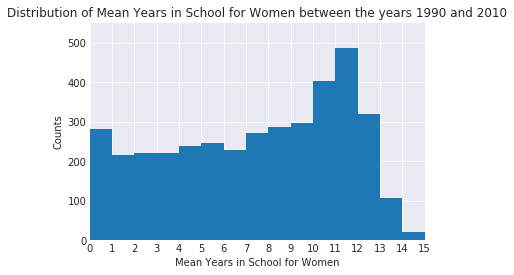

In [157]:
buckets=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.hist(df['yrs_in_school'],bins=buckets,histtype='bar');
plt.title("Distribution of Mean Years in School for Women between the years 1990 and 2010");
plt.axis([0, 15, 0, 550]) 
plt.ylabel('Counts')
plt.xlabel('Mean Years in School for Women')
locations=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.xticks(locations, labels);

> Plotting a scatterplot for Mean Total Years in School for Women vs child mortality

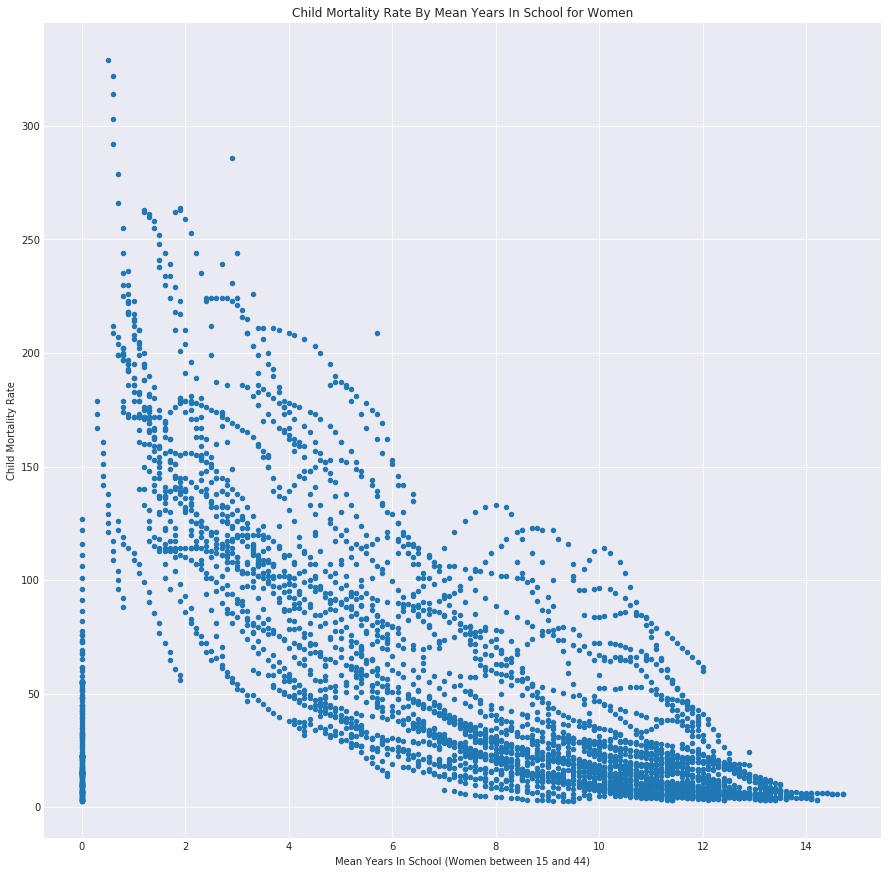

In [158]:
df.plot(kind='scatter', x='yrs_in_school', y='child_mortality', figsize=(15,15));
plt.ylabel('Child Mortality Rate')
plt.xlabel('Mean Years In School (Women between 15 and 44)')
plt.title('Child Mortality Rate By Mean Years In School for Women');

### The scatterplot above suggests that the Child Mortality Rate is decreases as the Mean number of Years spent in School by Women in their reproductive years increases i.e. Child Mortality Rate seems to be inversely proportional to mean years spent in school by women.

> Plotting a scatterplot for Mean Years in School for Women vs Women's Total Fertilty

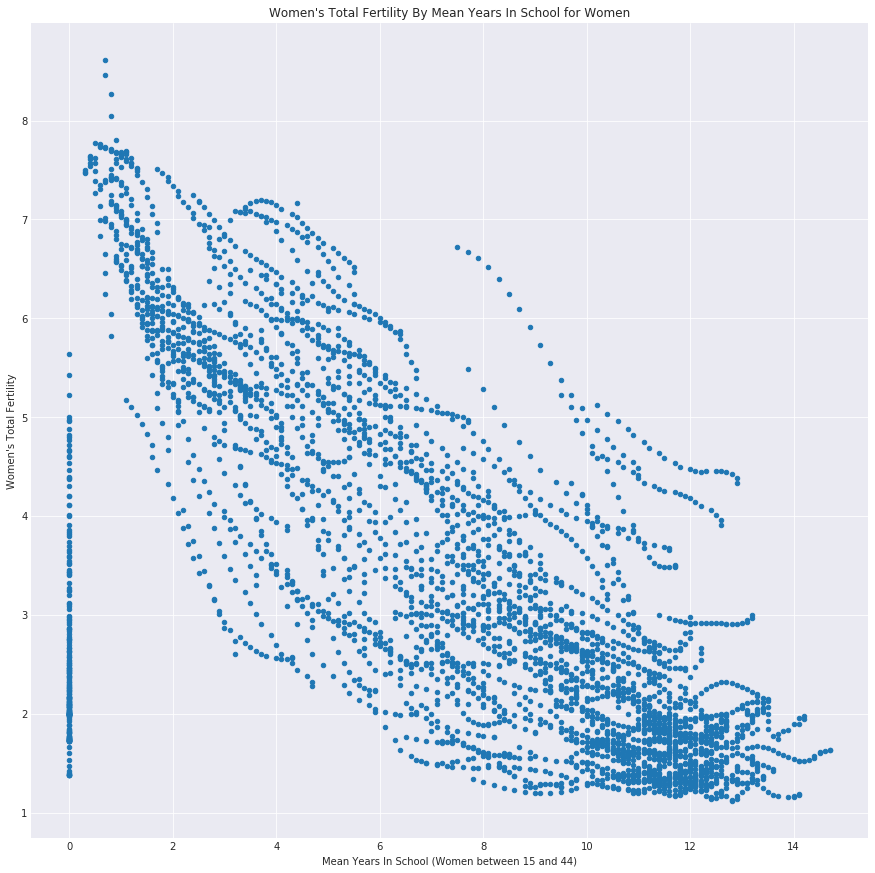

In [159]:
df.plot(kind='scatter', x='yrs_in_school', y='fertility', figsize=(15,15));
plt.ylabel('Women\'s Total Fertility')
plt.xlabel('Mean Years In School (Women between 15 and 44)')
plt.title('Women\'s Total Fertility By Mean Years In School for Women');

>As per the scatter plot above, as the number of years spent in school by women increases, the total fertility decreases.

> Plotting a scatterplot for Mean Years in School for Women vs Income (GDP per person)

In [ ]:
df.plot(kind='scatter', x='yrs_in_school', y='income', figsize=(15,15));
plt.ylabel('Income')
plt.xlabel('Mean Years In School (Women between 15 and 44)')
plt.title('Income By Mean Years In School for Women');

> As per the scatter plot above, as the number of years spent in school by women increases, the income (i.e. gdp per person) increases as well.

> Plotting a scatterplot for Mean Years in School for Women vs Women's BMI

In [ ]:
df.plot(kind='scatter', x='yrs_in_school', y='bmi', figsize=(15,15));
plt.ylabel('Women\'s BMI')
plt.xlabel('Mean Years In School (Women between 15 and 44)')
plt.title('Women\'s BMI By Mean Years In School for Women');

> As per the scatter plot above, as the number of years spent in school by women increases, the BMI of women increases.

<a id='conclusions'></a>
## Conclusions

> In summary, the dataset that we used in this project gives the following correlations:
1. Child Mortality Rate has fallen drastically since the 1800s. 
2. The Child Mortality Rate is lower for countries with higher gross domestic product per person.
3. The Child Mortality Rate is higher for lower women's BMI.
4. The Child Mortality Rate increases as the mean total number of children that women have in their lifetime increases.
5. The Child Mortality Rate reduces as number of years spent in school by women increases.
6. As the number of years spent in school by women increases, women's total fertility decreases.
7. As the number of years spent in school by women increases, the income (i.e. gdp per person) increases.
8. As the number of years spent in school by women increases, the BMI of women increases as well.

### Limitations

This analysis is subject to several limitations. The above mentioned conclusions do not state or imply that one change causes another. The conclusions merely point out a trend between 2 variables according to the dataset.
- The analysis is to be seen in light of the presenter's limited knowledge in Data Analysis.
- The analysis is limited to the scope of the dataset downloaded from Gapminder.
- The dataset contained some missing values which were either excluded or filled with zeroes or values from the closest year.
- The analysis, especially the bivariate plotting, is limited to the years between 1990 and 2010.

### References

- https://www.gapminder.org/data/
- https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.plot.html
- https://brohrer.github.io/matplotlib_ticks.html
- https://guides.github.com/pdfs/markdown-cheatsheet-online.pdf
- https://www.edureka.co/blog/wp-content/uploads/2018/10/Jupyter_Notebook_CheatSheet_Edureka.pdf
- https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
- https://stackoverflow.com
- https://wordvice.com/how-to-present-study-limitations-and-alternatives/